In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import collections
from collections import defaultdict
import nltk

In [42]:
electric_product = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'reviews_doRecommend'])
electric_product1 = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/1429_1.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'reviews_doRecommend'])
electric_product2 = pd.read_csv("C:/Users/vikar/Desktop/Viraj Karkar/Technocolab/Supervised ML Task-1/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", usecols=['reviews_text', 'reviews_rating','primaryCategories', 'reviews_doRecommend'])

In [43]:
electric_product.shape, electric_product1.shape, electric_product2.shape

((28332, 4), (34660, 4), (5000, 4))

In [44]:
electric = pd.concat([electric_product,electric_product1,electric_product2])
electric

,primaryCategories,reviews_doRecommend,reviews_rating,reviews_text
0,Health & Beauty,NaN,3.0,I order 3 of them and one of the item is bad q...
1,Health & Beauty,NaN,4.0,Bulk is always the less expensive way to go fo...
2,Health & Beauty,NaN,5.0,Well they are not Duracell but for the price i...
3,Health & Beauty,NaN,5.0,Seem to work as well as name brand batteries a...
4,Health & Beauty,NaN,5.0,These batteries are very long lasting the pric...
...,...,...,...,...
4995,Electronics,True,5.0,This is a great tablet for the price. Amazon i...
4996,Electronics,True,5.0,This tablet is the perfect size and so easy to...
4997,Electronics,True,4.0,Purchased this for my son. Has room to upgrade...
4998,Electronics,True,5.0,I had some thoughts about getting this for a 5...


In [45]:
electric.isna().sum()

primaryCategories          0
reviews_doRecommend    12840
reviews_rating            33
reviews_text               1
dtype: int64

In [46]:
electric.dropna(subset=['reviews_rating', 'reviews_text'], inplace=True)

In [47]:
electric.isna().sum()

primaryCategories          0
reviews_doRecommend    12806
reviews_rating             0
reviews_text               0
dtype: int64

In [48]:
import preprocess_kgptalkie as ps
import re
from bs4 import BeautifulSoup 

In [49]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [50]:
electric['reviews_text']= electric['reviews_text'].apply(lambda x: get_clean(x))

C:\Users\vikar\anaconda3\lib\site-packages\bs4\__init__.py:332: MarkupResemblesLocatorWarning: "......................................................" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [52]:
tfidf = TfidfVectorizer(max_features=30000, ngram_range=(1,5), analyzer='char')

In [53]:
x = tfidf.fit_transform(electric['reviews_text'])
y = electric['reviews_rating']

In [54]:
x.shape, y.shape

((67958, 30000), (67958,))

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [56]:
x_train.shape

(54366, 30000)

In [57]:
clf = LinearSVC(C=10)
clf.fit(x_train, y_train)

LinearSVC(C=10)

In [58]:
y_pred =clf.predict(x_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.68      0.69      0.68       262
         2.0       0.75      0.50      0.60       243
         3.0       0.68      0.53      0.59       612
         4.0       0.64      0.55      0.59      3094
         5.0       0.85      0.91      0.88      9381

    accuracy                           0.80     13592
   macro avg       0.72      0.63      0.67     13592
weighted avg       0.79      0.80      0.79     13592



In [60]:
from textblob import TextBlob

In [61]:
polarity=[]

for i in electric['reviews_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [62]:
electric['polarity']=polarity

In [63]:
electric

,primaryCategories,reviews_doRecommend,reviews_rating,reviews_text,polarity
0,Health & Beauty,NaN,3.0,i order 3 of them and one of the item is bad q...,-0.450000
1,Health & Beauty,NaN,4.0,bulk is always the less expensive way to go fo...,-0.333333
2,Health & Beauty,NaN,5.0,well they are not duracell but for the price i...,0.800000
3,Health & Beauty,NaN,5.0,seem to work as well as name brand batteries a...,0.500000
4,Health & Beauty,NaN,5.0,these batteries are very long lasting the pric...,0.245000
...,...,...,...,...,...
4995,Electronics,True,5.0,this is a great tablet for the price amazon is...,0.750000
4996,Electronics,True,5.0,this tablet is the perfect size and so easy to...,0.527083
4997,Electronics,True,4.0,purchased this for my son has room to upgrade ...,0.500000
4998,Electronics,True,5.0,i had some thoughts about getting this for a 5...,0.016667


In [64]:
positive_comments=electric[electric['polarity']==1]
negetive_comments=electric[electric['polarity']==-1]
neutral_comments=electric[electric['polarity']==0]

In [65]:
positive_comments.shape

(1313, 5)

In [66]:
negetive_comments.shape

(15, 5)

In [67]:
neutral_comments.shape

(4719, 5)

<AxesSubplot:>

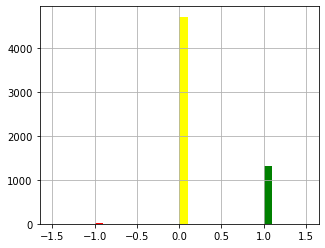

In [80]:
plt.figure(figsize = (5,4))
positive_comments['polarity'].hist(color = 'green')
negetive_comments['polarity'].hist(color = 'red')
neutral_comments['polarity'].hist(color = 'yellow')

In [69]:
from wordcloud import WordCloud,STOPWORDS

In [70]:
STOPWORDS=set(STOPWORDS)

In [71]:
total_comments=' '.join(positive_comments['reviews_text'])

In [72]:
cloud = WordCloud(width=1000,height=500,stopwords=STOPWORDS).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

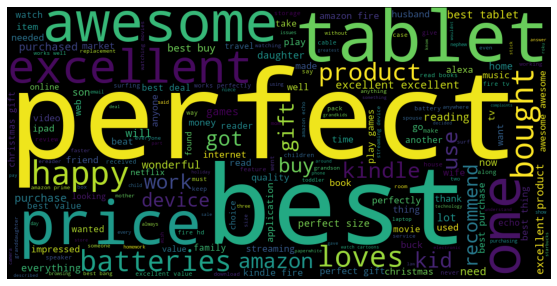

In [73]:
plt.figure(figsize=(15,5))
plt.imshow(cloud)
plt.axis('off')

In [74]:
total_comments=' '.join(negetive_comments['reviews_text'])

In [75]:
cloud1 = WordCloud(width=1000,height=500,stopwords=STOPWORDS).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

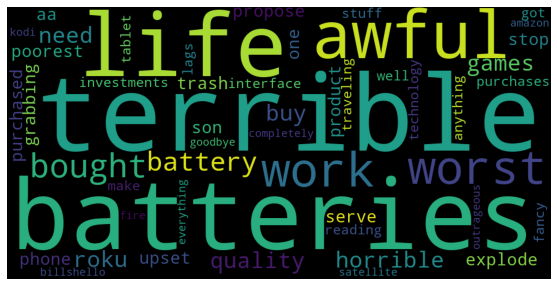

In [76]:
plt.figure(figsize=(15,5))
plt.imshow(cloud1)
plt.axis('off')

<AxesSubplot:>

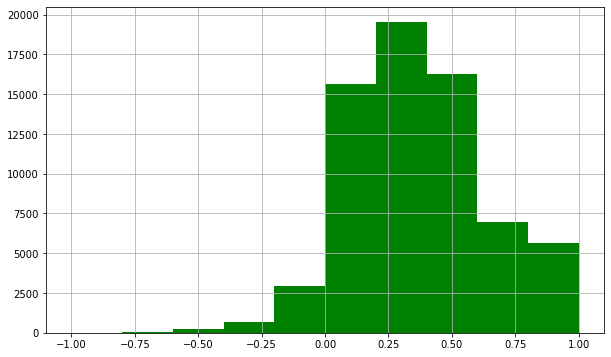

In [77]:
plt.figure(figsize = (10,6))
electric['polarity'].hist(color = 'green')

C:\Users\vikar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


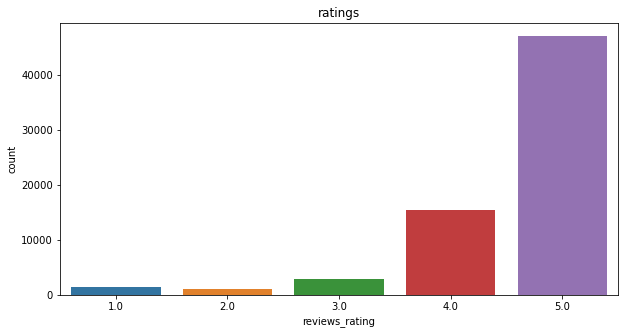

In [78]:
plt.figure(figsize=(10,5))
sns.countplot(electric['reviews_rating'])
plt.title('ratings')
plt.show()